<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/keras/Model_1_fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
'''
import numpy as np
import keras
#from keras.models import Sequential
#from keras.layers import Activation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Convolution2D
#from tf.keras.layers.core import Dense, Flatten
from tensorflow. keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
print(tf.__version__)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2.2.0-rc2


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
len(train_images),  len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [16]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
train_images = train_images/255
test_images = test_images/255

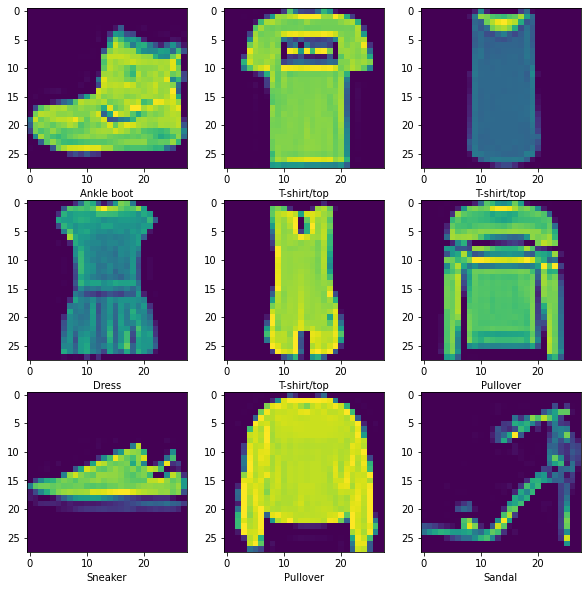

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])


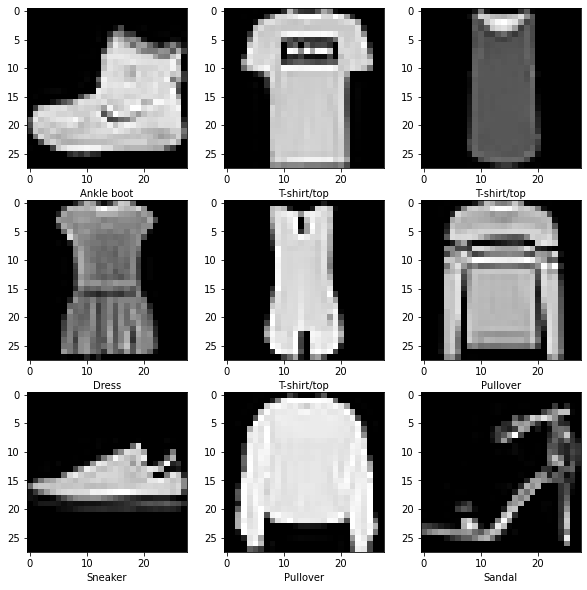

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap= 'gray')
  plt.xlabel(class_names[train_labels[i]])


In [0]:
#train_images  = train_images.reshape(60000, 28*28)
#test_images  = test_images.reshape(10000, 28*28)
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000, 28,28,1)

In [21]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 12345)
X_test = test_images

In [46]:
print(X_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


In [0]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [0]:
cnn_model = models.Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 32, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [58]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
________________________________________________

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [68]:
epochs = 70

history = cnn_model.fit(X_train, y_train, batch_size = 100, epochs = epochs,
                        verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/70
480/480 [==============================] - 2s 4ms/step - loss: 0.3689 - accuracy: 0.8659 - val_loss: 0.4041 - val_accuracy: 0.8648
Epoch 2/70
480/480 [==============================] - 2s 4ms/step - loss: 0.3121 - accuracy: 0.8756 - val_loss: 0.4041 - val_accuracy: 0.8737
Epoch 3/70
480/480 [==============================] - 2s 4ms/step - loss: 0.2852 - accuracy: 0.8835 - val_loss: 0.3743 - val_accuracy: 0.8822
Epoch 4/70
480/480 [==============================] - 2s 4ms/step - loss: 0.2672 - accuracy: 0.8907 - val_loss: 0.3726 - val_accuracy: 0.8825
Epoch 5/70
480/480 [==============================] - 2s 4ms/step - loss: 0.2482 - accuracy: 0.8948 - val_loss: 0.3588 - val_accuracy: 0.8928
Epoch 6/70
480/480 [==============================] - 2s 4ms/step - loss: 0.2340 - accuracy: 0.8997 - val_loss: 0.3721 - val_accuracy: 0.8923
Epoch 7/70
480/480 [==============================] - 2s 4ms/step - loss: 0.2273 - accuracy: 0.9039 - val_loss: 0.3710 - val_accuracy: 0.8934
Epoch 

In [69]:
y_test = test_labels
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.6218 - accuracy: 0.8946
Test Accuracy : 0.895


In [0]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

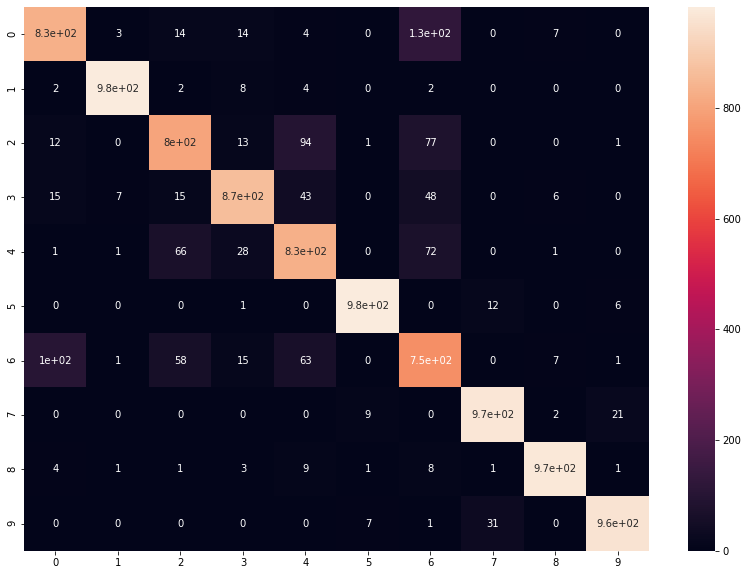

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [72]:
cm

array([[832,   3,  14,  14,   4,   0, 126,   0,   7,   0],
       [  2, 982,   2,   8,   4,   0,   2,   0,   0,   0],
       [ 12,   0, 802,  13,  94,   1,  77,   0,   0,   1],
       [ 15,   7,  15, 866,  43,   0,  48,   0,   6,   0],
       [  1,   1,  66,  28, 831,   0,  72,   0,   1,   0],
       [  0,   0,   0,   1,   0, 981,   0,  12,   0,   6],
       [103,   1,  58,  15,  63,   0, 752,   0,   7,   1],
       [  0,   0,   0,   0,   0,   9,   0, 968,   2,  21],
       [  4,   1,   1,   3,   9,   1,   8,   1, 971,   1],
       [  0,   0,   0,   0,   0,   7,   1,  31,   0, 961]])

In [73]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.83      0.85      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.84      0.80      0.82      1000
     Class 3       0.91      0.87      0.89      1000
     Class 4       0.79      0.83      0.81      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.69      0.75      0.72      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.97      0.97      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.89      0.90     10000



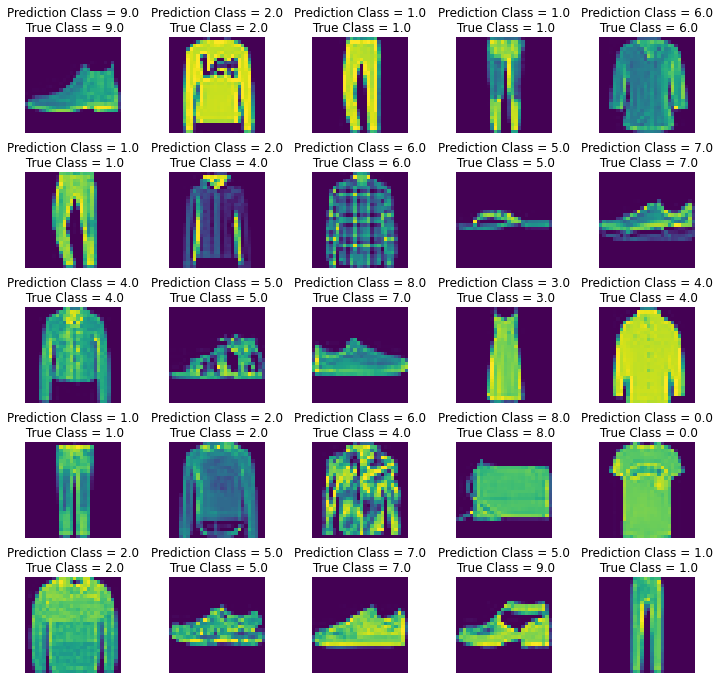

In [74]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, batch_size=100, epochs = 20, verbose=1)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 2.9417 - accuracy: 0.2537
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1999

In [0]:
train_images_rows, train_images_cols = 28, 28
input_shape = (train_images_rows, train_images_cols, 1)
batch_size = 128
num_classes = 10
epochs = 12

In [168]:
layer1 = tf.keras.layers.Conv2D(32, kernel_size=(3,3),strides = (1,1), padding = 'valid', activation= 'relu', input_shape = (784,))
layer2 = tf.keras.layers.Conv2D(64, kernel_size=(3,3),strides = (1,1), padding = 'valid', activation= 'relu', input_shape = (784,))
tf.keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) 
#layer3 = tf.keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) 
layer4 = tf.keras.layers.Dense(10, activation='softmax')
'''
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))
my_model.add(Flatten())
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(10, activation='softmax'))
'''

AttributeError: ignored

In [182]:
my_model = tf.keras.Sequential(tf.keras.layers.Conv2D(32, kernel_size =(3,3), strides=(1, 1), padding='valid', activation='relu',input_shape=(784,)), 
                               tf.keras.layers.Dense(10,activation = 'softmax'))


ValueError: ignored

In [112]:
my_model.add(Conv2D(32, kernel_size=(3,3),strides = (1,1), padding = 'valid', activation= 'relu', input_shape = (784,)))
my_model.add(Conv2D(64, kernel_size=(3,3),strides = (1,1), padding = 'valid', activation= 'relu', input_shape = (784,)))
my_model.add(MaxPooling2D(pool_size=(2, 2)))
my_model.add(Dropout(0.25))
my_model.add(Flatten())
my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(10, activation='softmax'))





model = tf.keras.Sequential(layer1, layer2)
'''

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
'''

NameError: ignored

In [102]:
model = tf.keras.Sequential(
    Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),Dropout(0.25),
Flatten(),
Dense(128, activation='relu'),Dropout(0.5),
Dense(num_classes, activation='softmax'))


SyntaxError: ignored

In [75]:
'''
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['dog', 'cat'], batch_size=10)
    '''

"\ntrain_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),\n    classes=['dog', 'cat'], batch_size=10)\nvalid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),\n    classes=['dog', 'cat'], batch_size=4)\ntest_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),\n    classes=['dog', 'cat'], batch_size=10)\n    "